# Frequency Distribution
#### Algo développé par @DemangeJeremy

In [3]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import spacy

In [15]:
# Texte 
corpus = """
Françaises , Français ,

Mes chers compatriotes de l' hexagone , d' outre-mer et de l' étranger ,

Ce soir , nous ne vivons pas un 31 décembre comme les autres .

Là où , dans nos villes et nos villages , l' heure est d' habitude aux grands rassemblements , ils sont cette année interdits par l' épidémie : les places de nos communes sont éteintes , nos foyers moins joyeux qu' à l' accoutumée .

L' année 2020 s' achève donc comme elle s' est déroulée : par des efforts et des restrictions . Et j' ai pleinement conscience , par les décisions que j' ai eues à prendre , des sacrifices que je vous ai demandés .

Je suis sincèrement convaincu que nous avons fait les bons choix aux bons moments et je veux vous remercier de votre civisme . De cet esprit de responsabilité collective par lequel nous avons sauvé tant de vies et qui nous permet aujourd'hui de tenir mieux que beaucoup face à l' épidémie .

En votre nom , j' ai ce soir une pensée pour les 64 000 victimes de ce virus , leurs familles et leurs proches . Des parents , des amis , des pans entiers de l' imaginaire français nous ont quitté ces derniers mois .

Oui , cette année 2020 a été difficile . Elle nous a rappelé nos vulnérabilités . Elle a été encore plus injuste pour les plus fragiles . Mais ensemble nous en sortons encore plus unis , et en ayant beaucoup appris .

J' ai aussi une pensée pour tous nos compatriotes vivant dans la précarité , parfois la pauvreté , pour qui la crise que nous traversons rend le quotidien plus difficile encore .

Je veux dire notre reconnaissance à ceux qui se sont mobilisés pour soigner , nourrir , éduquer , protéger , à tous ceux qui par leur travail , leur engagement nous ont permis de tenir debout et ensemble durant ces mois difficiles . Et qui ce soir encore , le font pour la Nation .

A nos concitoyens œuvrant dans les secteurs de la culture , du sport , de la restauration , de l' hôtellerie , du tourisme , ou de l' évènementiel , aux étudiants qui ont souffert et souffrent encore davantage que les autres , je veux leur redire que nous serons là .

Evidemment pour réussir à sortir au plus vite de cette situation .

Et pour leur permettre de tenir dans cette période si dure et injuste pour eux où nous leur demandons de travailler autrement , et parfois même de renoncer à leur activité .

Cette épreuve historique a aussi révélé la solidité de notre Nation .

Malgré la pandémie , nous n' avons jamais renoncé à poursuivre notre ambition de progrès pour chacun en baissant les impôts , en ouvrant de nouveaux droits comme le congé pour les aidants , l' allongement du congé paternité , en soutenant , par des primes , la conversion de notre parc automobile , en ouvrant sur tout le territoire des maisons France services , en investissant dans notre souveraineté et notre recherche de manière historique , en agissant pour produire davantage en France , en Europe .

Nos soignants ont non seulement tenu mais nous avons engagé une transformation en profondeur et des investissements historiques pour notre santé , dont les prochaines années révéleront la pertinence .

Notre pays est l' un de ceux qui est le plus intervenu pour protéger et accompagner les jeunes , les travailleurs , les entrepreneurs . Ce « quoi qu' il en coûte » , je l' assume car il a permis de préserver des vies et de protéger des emplois . Il nous faudra bâtir ensemble les réponses qui permettront de ne pas en faire un fardeau pour les générations futures .

Ce soir pour la première fois un pays , le Royaume-Uni , quittera l' Union Européenne . Nous avons scellé il y a quelques jours un accord pour organiser nos relations futures avec lui en défendant nos intérêts , nos industriels , nos pêcheurs et notre unité européenne . Le Royaume Uni demeure notre voisin mais aussi notre ami et notre allié . Ce choix de quitter l' Europe , ce Brexit , a été l' enfant du malaise européen et de beaucoup de mensonges et de fausses promesses . Mais je veux , moi , vous dire très clairement : notre destin est d'abord en Europe .

Notre souveraineté est nationale et je ferai tout pour que nous retrouvions la maîtrise de notre destinée et de nos vies . Mais cette souveraineté passe aussi par une Europe plus forte , plus autonome , plus unie . C' est ce que nous avons bâti en 2020 .

Parce que nous avons su conduire les transformations nécessaires et renforcer notre crédibilité , nous avons su convaincre l' Allemagne puis les autres membres de l' Union Européenne de concevoir un plan de relance unique et massif et de décider d' un endettement commun et solidaire pour mieux préparer notre avenir en nous engageant dans la transition écologique et numérique et en créant autant d' emplois que nous le pouvons pour notre jeunesse .

Oui , cette année 2020 ne se résume pas à l' épidémie même si celle -ci a changé nos vies .

Elle a aussi à mes yeux révélé des parcours exemplaires qui sont autant de boussoles pour les temps à venir .

Notre plus grande fierté en effet ce sont les Françaises et les Français . Vous .

Marie-Corentine a 24 ans . Au printemps dernier , cette infirmière fraîchement diplômée originaire de Limoges n' a pas hésité à tout quitter pour prêter main forte aux équipes de l' hôpital de Créteil débordées par l' afflux des malades du virus .

Jean-Luc est chauffeur-éboueur en Guyane . Avec ses collègues Anthony et Maxime , ils n' ont jamais cessé de travailler depuis le début de la pandémie . Au plus fort du confinement , ils constituaient cette « deuxième ligne » qui a permis au pays de continuer à vivre , et à la vie de continuer .

Gérald est entrepreneur près d' Angers . Pour faire face à la demande de masques , il a , avec ses salariés , réussi la prouesse d' ouvrir ses usines 7 jours sur 7 , 24 heures sur 24 et , plus récemment , d' en installer une autre en un temps record .

Lucas a 11 ans et habite Béthune . Lorsqu' il a découvert la situation d' isolement des personnes âgées atteintes de la COVID-19 dans l' hôpital de sa ville , il n' a pas hésité une seconde et a fait don de sa tablette pour leur permettre de communiquer avec leurs proches et de retrouver le sourire . Il a été suivi par de nombreux autres .

Rosalie est libraire à Bagnolet en Seine-Saint Denis . Comme tous ses confrères , elle a beaucoup souffert de la fermeture des commerces , malgré les aides , elle a su innover . Mettre en place un site internet pour permettre la vente à emporter lors des semaines les plus dures . Et les clients , à Noël , ont répondu présents .

Romain est gendarme à Tende , dans les Alpes-Maritimes . La nuit du 2 au 3 octobre , des inondations menacent d' emporter une maison de retraite . Au péril de sa vie , il parvient à évacuer plus de 70 résidents , leur sauvant la vie . Avec les policiers de Nice , qui ont mis fin à l' attentat de la Basilique Notre-Dame de l' Assomption , avec Arno , Cyrille et Rémi , gendarmes tués alors qu' ils portaient secours à une femme battue dans le Puy de Dôme , avec Tanerii , Dorian et Quentin , militaires morts lundi dernier en opération au Mali , ils sont des héros de la Nation .

Medhi est professeur de sciences économiques et sociales dans les quartiers Nord de Marseille . Comme des milliers d' enseignants , il a eu , quelques jours après l' assassinat de Samuel PATY , à organiser un cours sur la laïcité . Pour cela , il a pris le temps de se former auprès d' autres professeurs et d' inspecteurs d' académie . Avec courage , il est alors revenu auprès de ses élèves sur nos valeurs , leur histoire . Assumant cette haute mission de notre école , de nos enseignants : faire des républicains .

Wendie est footballeuse . Comme tous les sportifs amateurs et professionnels , elle a vécu une saison difficile avec des entraînements impossibles , des compétitions décalées , des matchs sans public . Pourtant , elle a puisé en elle la force d' âme d' aller remporter avec son club de toujours une 7ème Ligue des champions , un record , et de nous faire rêver dans cette période grise .

Mauricette a 78 ans . Elle réside dans une maison de retraite de Sevran et il y a quelques jours , vous l' avez tous vu , comme moi , elle a été la première française à se vacciner contre la COVID 19 , envoyant , contre l' obscurantisme et le complotisme , un magnifique message d' espoir pour l' année qui s' ouvre .

Tous ces prénoms , ces visages sont ceux de votre sœur , de votre voisin , de vos amis , de ces milliers d' anonymes qui , engagés et solidaires , ont tenu notre pays dans l' épreuve .

Tous ces prénoms , ces visages sont ceux de l' espérance . Ceux de France .

Mes chers compatriotes ,

Notre Nation a traversé cette année avec une telle unité et une telle résilience : rien ne peut lui résister .

Notre Nation a été capable , dans ces temps difficiles , de tant d' innovation , d' inventivité , de générosité : tout lui est possible .

En 2021 , quoi qu' il arrive , nous saurons donc faire face aux crises – sanitaire , économique et sociale , terroriste , climatique – qui ne s' éteindront pas avec le 1er janvier . Les premiers mois de l' année seront difficiles et , au moins jusqu' au printemps l' épidémie pèsera encore beaucoup sur la vie de notre pays .

En 2021 , quoi qu' il arrive , parce que nous nous y sommes préparés , nous saurons aussi relever les défis à venir :

-la transition écologique et la protection de la biodiversité , avec la mise en œuvre des propositions de la convention citoyenne , et d' autres réformes .

-la lutte pour la République et pour nos valeurs , la laïcité , la fraternité , pour plus de sécurité. -la poursuite de notre engagement pour le mérite , le travail , l' égalité des chances et la lutte contre toutes les inégalités et les discriminations .

Les épreuves que nous avons affrontées auraient pu émousser notre enthousiasme , désaltérer l' espoir . Il n' en n' est rien .

L' espoir est là dans ce vaccin que le génie humain a fait advenir en un an seulement . C' était impensable il y a encore quelques mois . Et je vous le dis avec beaucoup de détermination ce soir : je ne laisserai personne jouer avec la sûreté et les bonnes conditions , encadrées par nos scientifiques et nos médecins , dans lesquelles la vaccination doit se faire . Je ne laisserai pas davantage , pour de mauvaises raisons , une lenteur injustifiée s' installer : chaque Français qui le souhaite doit pouvoir se faire vacciner . De manière sûre et dans le bon ordre , en commençant par ceux qui présentent le plus de risques .

L' espoir est là , et l' espoir grandit chaque jour dans cette relance qui déjà frémit en France plus qu' ailleurs et qui va nous permettre , dès le printemps , d' inventer une économie plus forte , tout à la fois créatrice d' emplois , plus innovante , plus respectueuse du climat et de la biodiversité et plus solidaire . Et je sais le Premier ministre et le gouvernement pleinement mobilisés .

L' espoir vit dans la liberté que nous retrouverons , dans la force de notre culture , de notre art de vivre à la française , dans les leçons aussi que nous saurons tirer de cette crise pour plus de simplicité , d' efficacité , et parfois tout simplement , de bon sens .

L' espoir vit dans notre jeunesse . Nous lui avons tant demandé : des sacrifices , de renoncer aux rencontres qui sont à cet âge plus qu' à d' autres le sel de la vie . Nous lui avons tant demandé pour sauver des vies en particulier celles des plus fragiles de nos aînés . Nous sommes donc ses débiteurs pour nos choix à venir et je m' y engage : c' est pour notre jeunesse que nous devons continuer à agir , à transformer , à avancer . Nous n' ajouterons pas au coût de la crise , celui de l' inaction .

En luttant contre le virus , en nous battant contre ses conséquences économiques et sociales , en refondant une société plus forte , fraternelle et durable , c' est la France de 2030 que nous bâtirons . Tel est notre cap .

Alors ensemble , dans la concorde , regardons devant nous , regardons notre avenir , préparons dès aujourd'hui ce printemps 2021 qui sera le début d' un nouveau matin français , d' une renaissance européenne .

Restons ce peuple uni , solidaire , fier de son histoire , de ses valeurs , de sa culture , confiant dans l' avenir et le progrès , sûr de son talent et de son énergie et ambitieux pour lui-même . Quoi qu' il arrive .

Soyons fiers . Fiers d' être « nous » , les Français , la France .

Voilà mes chers compatriotes .

Bonne année à tous .

Que 2021 soit une année heureuse pour chacune et chacun et une année utile pour notre pays .

Vive la République .

Vive la France .
"""

In [5]:
nlp = spacy.load("fr_core_news_md")

In [16]:
doc = nlp(corpus)

In [21]:
token = []
for tok in doc:
    if not tok.is_punct and not tok.is_stop:
        if len(tok.lemma_) > 1 and "\n" not in tok.lemma_ and "qu" not in tok.lemma_:
            token.append(tok.lemma_.lower())
            # tok.append(token.lemma_.lower())

In [22]:
fdist = FreqDist(token)
print(fdist)

<FreqDist with 539 samples and 814 outcomes>


In [23]:
fdist.most_common(10)

[('année', 11),
 ('français', 10),
 ('vie', 10),
 ('permettre', 8),
 ('faire', 8),
 ('france', 7),
 ('savoir', 7),
 ('espoir', 7),
 ('bon', 6),
 ('difficile', 6)]

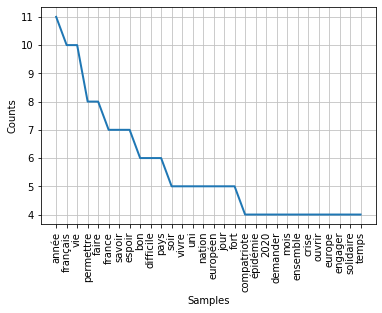

In [35]:
import matplotlib.pyplot as plt
pl = fdist.plot(30,cumulative=False)
pl